<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Make-plots-pretty-with-some-configuration" data-toc-modified-id="Make-plots-pretty-with-some-configuration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Make plots pretty with some configuration</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Use-only-data-for-group_2" data-toc-modified-id="Use-only-data-for-group_2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Use only data for group_2</a></span></li><li><span><a href="#Calculate-user-engament-from-the-registration-day-to-the-pop-up-notification-day" data-toc-modified-id="Calculate-user-engament-from-the-registration-day-to-the-pop-up-notification-day-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Calculate user engament from the registration day to the pop-up notification day</a></span></li><li><span><a href="#Split-active-and-not-active-enough-users" data-toc-modified-id="Split-active-and-not-active-enough-users-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Split active and not active enough users</a></span></li></ul></li><li><span><a href="#How-many-users-allowed-and-not-allowed-notifications" data-toc-modified-id="How-many-users-allowed-and-not-allowed-notifications-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How many users allowed and not allowed notifications</a></span></li><li><span><a href="#When-notifications-were-sent" data-toc-modified-id="When-notifications-were-sent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>When notifications were sent</a></span></li><li><span><a href="#Proportions-of-answers-to-pop-up-notification-by-each-activity-subgroup" data-toc-modified-id="Proportions-of-answers-to-pop-up-notification-by-each-activity-subgroup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Proportions of answers to pop-up notification by each activity subgroup</a></span></li><li><span><a href="#Did-users-leave-money-in-the-game" data-toc-modified-id="Did-users-leave-money-in-the-game-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Did users leave money in the game</a></span></li><li><span><a href="#Which-other-feature-contribute-the-most" data-toc-modified-id="Which-other-feature-contribute-the-most-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Which other feature contribute the most</a></span><ul class="toc-item"><li><span><a href="#Load-all-user-history-data" data-toc-modified-id="Load-all-user-history-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Load all user history data</a></span></li><li><span><a href="#Drop-rows-that-doesn't-contain-allowed-notification-status" data-toc-modified-id="Drop-rows-that-doesn't-contain-allowed-notification-status-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop rows that doesn't contain allowed notification status</a></span></li><li><span><a href="#Convert-allowed-notifications-column-to-0-and-1-values" data-toc-modified-id="Convert-allowed-notifications-column-to-0-and-1-values-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Convert allowed notifications column to 0 and 1 values</a></span></li><li><span><a href="#Get-most-correlated-features-with-allowed-notifications-(Pearson-method)" data-toc-modified-id="Get-most-correlated-features-with-allowed-notifications-(Pearson-method)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Get most correlated features with allowed notifications (Pearson method)</a></span></li></ul></li></ul></div>

# Analysis of users who have completed tutorial

### Data pre-processing

#### Import libraries

In [1]:
import pandas as pd # used for data storage
import numpy as np # used for data calculations

import matplotlib.pyplot as plt # used for plots
# plots to be shown
%matplotlib inline 

from PIL import Image
import requests
from io import BytesIO
from highlight_text import htext

from collections import Counter # used for fast frequency calculations

pd.set_option('display.max_columns', 500) # maximum number of columns to be shown
pd.set_option('display.max_rows', 500) # maximum number of rows to be shown

pd.options.mode.chained_assignment = None 

#### Make plots pretty with some configuration

In [27]:
text_color = "w"
background = "#0e2058"
plt.rcParams['figure.facecolor'] = background
plt.rcParams['axes.facecolor'] = background
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['figure.titleweight'] = "bold" 
plt.rcParams['figure.figsize'] = (12, 6)

plt.rcParams["legend.facecolor"] = background
plt.rcParams["legend.frameon"] = False
plt.rcParams["font.fantasy"] = "Charcoal" 
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = text_color

colors = ["#00752d", "#bd1313", "#0558ff", "#ff05cd", "#a442f5", "#f2c641", "#ba6b09", "#3b6e5c"]

def pretty_plot(url): 
    # adding logo
    ax2 = fig.add_axes([-0.04, 0.96, 0.15, 0.15])
    ax2.axis("off")
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    #img = Image.open(url)
    ax2.imshow(img)

    s = "Heroic - AB test - <group_2>"
    htext.fig_htext(s, 0.15, 1.02, highlight_colors="#00752d", highlight_weights=["bold"],
                   string_weight="bold", fontsize=22, color=text_color)

#### Load data

In [3]:
user_data = pd.read_csv("user_data.csv", usecols=["login_id", "dau", "date_id", "retention",\
                                                  "allowed_notifications", "registration_channel",\
                                                  "payer", "group"], low_memory=False)

#### Use only data for group_2
- Use data for all dates
- Use data for only pop-up date

In [4]:
g2_activity = user_data[user_data['group'] == "group_2"].drop("group", axis=1)
g2_notifications = g2_activity[~g2_activity.allowed_notifications.isnull()] 

In [5]:
g2_notifications.head()

,login_id,allowed_notifications,date_id,registration_channel,payer,dau,retention
5,193,True,0,Paid,False,1,0
17,105,True,0,Paid,False,1,0
22,287,True,0,Paid,False,1,0
25,207,True,0,Paid,False,1,0
37,41,True,0,Paid,False,1,0


#### Calculate user engament from the registration day to the pop-up notification day
- Calculate user activity (was user active in all days until pop-up day)
- Get activity for all users

In [6]:
def calculate_activity(user_notification):
    user_activity = g2_activity[g2_activity["login_id"] == user_notification.iloc[0,0]]
    activity_bool = all(len(pd.DataFrame({'retention': [x], 'dau': [1]}).merge(user_activity[['retention', 'dau']]).drop_duplicates()) == len(pd.DataFrame({'retention': [x], 'dau': [1]}).drop_duplicates()) for x in range(user_notification.iloc[0,6] + 1))
    if activity_bool:
        return 1
    else:
        return 0
    
def add_activity(df):
    
    activity = [calculate_activity(df[df['login_id'] == i]) 
                     for i in tuple(df['login_id'])]
    df['activity'] = activity

In [7]:
add_activity(g2_notifications)

#### Split active and not active enough users 

In [8]:
g2_active = g2_notifications[g2_notifications["activity"] == 1]
g2_not_active = g2_notifications[g2_notifications["activity"] == 0]

### How many users allowed and not allowed notifications
- Print values 
- Plot proportions

In [9]:
g2_active_allowed = Counter(g2_active.allowed_notifications)[True]
g2_active_not_allowed = Counter(g2_active.allowed_notifications)[False]
g2_not_active_allowed = Counter(g2_not_active.allowed_notifications)[True]
g2_not_active_not_allowed = Counter(g2_not_active.allowed_notifications)[False]

print(f"Number of active users who allowed notifications: {g2_active_allowed}.")
print(f"Number of active users who not allowed notifications: {g2_active_not_allowed}.")
print(f"Number of not active users who allowed notifications: {g2_not_active_allowed}.")
print(f"Number of not active users who not allowed notifications: {g2_not_active_not_allowed}.")

Number of active users who allowed notifications: 836.
Number of active users who not allowed notifications: 491.
Number of not active users who allowed notifications: 25.
Number of not active users who not allowed notifications: 20.


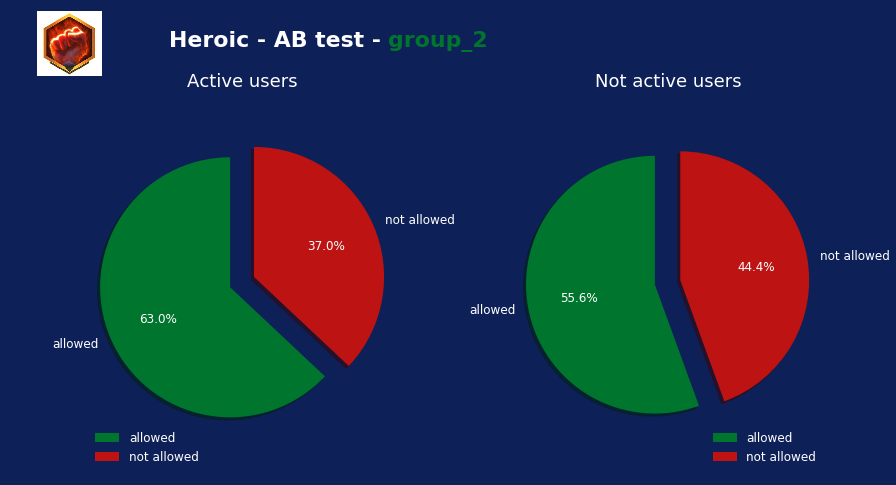

In [10]:
fig = plt.figure()
plt.subplot(121)
plt.pie([g2_active_allowed, g2_active_not_allowed],
    labels=["allowed", "not allowed"],
    shadow=True,
    colors=colors,
    explode=(.2, 0),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower left")
plt.title("Active users", fontsize=18)

plt.subplot(122)
plt.pie([g2_not_active_allowed, g2_not_active_not_allowed],
    labels=["allowed", "not allowed"],
    shadow=True,
    colors=colors,
    explode=(0, .2),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower right")
plt.title('Not active users', fontsize=18)
plt.tight_layout()

pretty_plot("Heroic-Magic-Duel-Ruuk-Spell-Fury.jpg")


We have significantly more users who played the game every day until they received a notification pop-up than users who had a break of playing. We are more interested in active users and results confirmed that if a player get hooked with the game, he will probably allow notifications (63% of the time).  

### When notifications were sent
- Print for each subgroup by date
- Plot proportions

In [11]:
g2_active.groupby("retention").login_id.count()

retention
0    1154
1     145
2      24
3       4
Name: login_id, dtype: int64

In [12]:
g2_not_active.groupby("retention").login_id.count()

retention
2     14
3     10
4      9
5      6
7      3
8      1
9      1
14     1
Name: login_id, dtype: int64

In [13]:
# We can see that last several values are pretty small. Group them together.
active_by_day_values = list(g2_active.groupby("retention").login_id.count()[:2])
active_other = g2_active.groupby("retention").login_id.count()[2:].sum()
active_by_day_values.append(active_other)
active_by_day_keys = list(range(0,2))
active_by_day_keys.append("other")

not_active_by_day_values = list(g2_not_active.groupby("retention").login_id.count()[:3])
not_active_other = g2_not_active.groupby("retention").login_id.count()[1:].sum()
not_active_by_day_values.append(not_active_other)
not_active_by_day_keys = list(range(2,5))
not_active_by_day_keys.append("other")

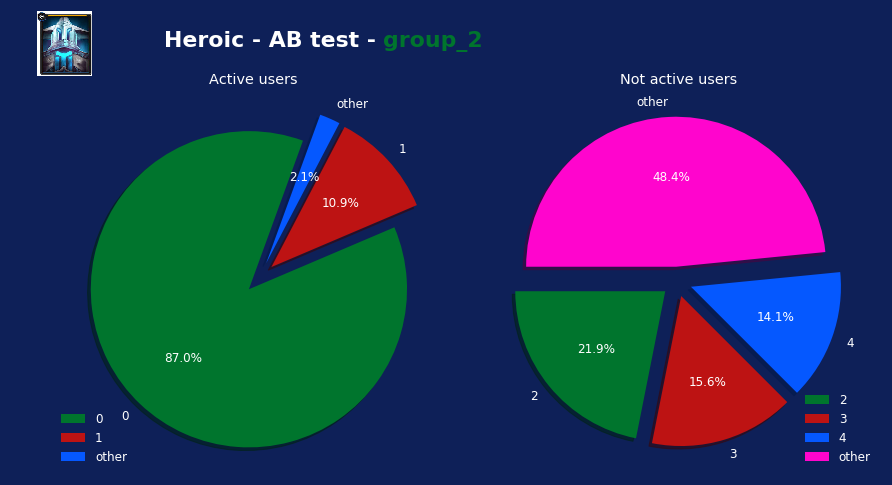

In [16]:
fig = plt.figure()
plt.subplot(121)
plt.pie(active_by_day_values,
    labels=active_by_day_keys,
    shadow=True,
    colors=colors,
    explode=(.1, .1, .1),
    startangle=70,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower left")
plt.title("Active users")

plt.subplot(122)
plt.pie(not_active_by_day_values,
    labels=not_active_by_day_keys,
    shadow=True,
    colors=colors,
    explode=(.1, .1, .1, .1),
    startangle=180,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower right")
plt.title('Not active users')
plt.tight_layout()

pretty_plot("https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSD6SXl9G4kTqaDFOqvKPXVfNaFcP4JWvG-FQ&usqp=CAU")


It's is clear that users are active on the installation day (0). If users received a pop-up notification on their first day, it is known they have been active on that day also. But after first day, everything can happen regards to their activity and notification pop-up status. Two days after installation, active users will more probably allow notifications (based on this sample __24 : 14__), but after that period that's not the case.   

### Proportions of answers to pop-up notification by each activity subgroup

In [17]:
g2_active.groupby(["allowed_notifications", "retention"]).login_id.count()

allowed_notifications  retention
False                  0            425
                       1             51
                       2             13
                       3              2
True                   0            729
                       1             94
                       2             11
                       3              2
Name: login_id, dtype: int64

In [18]:
g2_not_active.groupby(["allowed_notifications", "retention"]).login_id.count()

allowed_notifications  retention
False                  2            5
                       3            5
                       4            4
                       5            3
                       7            1
                       8            1
                       14           1
True                   2            9
                       3            5
                       4            5
                       5            3
                       7            2
                       9            1
Name: login_id, dtype: int64

In [19]:
active_true = Counter(g2_active[g2_active["allowed_notifications"] == True].retention)
active_false = Counter(g2_active[g2_active["allowed_notifications"] == False].retention)

active_values_true = list(active_true.values())[:2]
other_true = sum(list(active_true.values())[2:])
active_values_true.append(other_true)

active_values_false = list(active_false.values())[:2]
other_false = sum(list(active_false.values())[2:])
active_values_false.append(other_false)

active_values = active_values_true + active_values_false

active_keys_true = list(active_true.keys())[:2]
active_keys_true = [str(i) + "_true" for i in active_keys_true]
active_keys_true.append("other_true")

active_keys_false = list(active_false.keys())[:2]
active_keys_false = [str(i) + "_false" for i in active_keys_false]
active_keys_false.append("other_false")

active_keys = active_keys_true + active_keys_false

In [20]:
active_two_days_values_true = sum(list(active_true.values())[:2])
active_two_days_values_false = sum(list(active_false.values())[:2])
active_two_days_values = (active_two_days_values_true, active_two_days_values_false)
active_two_days_keys = ("allowed", "not allowed")

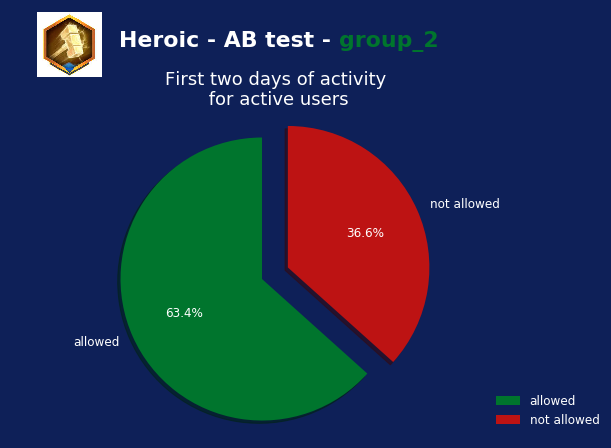

In [25]:
# fig = plt.figure()
# plt.subplot(121)
# plt.pie(active_values,
#     labels=active_keys,
#     shadow=True,
#     colors=colors,
#     explode=(.1, .1, .1, .1, .1, .1),
#     startangle=45,
#     autopct='%1.1f%%')
# plt.axis('equal')
# plt.legend(loc="lower left", bbox_to_anchor=(-0.5, 0))
# plt.title("Active users by activity\n and allowed notifications status",fontsize=22)
fig = plt.figure()
plt.rcParams['figure.figsize'] = (6, 6)
plt.subplot(111)
plt.pie(active_two_days_values,
    labels=active_two_days_keys,
    shadow=True,
    colors=colors,
    explode=(.1, .1,),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
plt.title('First two days of activity\n for active users',fontsize=18)
#plt.tight_layout()
pretty_plot("download.jpeg")

It's a higher probability that active users will allow notifications on their first two days of playing game experience. It seems these users get hooked with the games, and they don't have the problem of 5 battles tutorial or notifications.  

### Did users leave money in the game

In [26]:
by_reg_channel = g2_notifications.groupby(["allowed_notifications", "registration_channel"]).login_id.count()
by_reg_channel_false = by_reg_channel[0]
by_reg_channel_true = by_reg_channel[1]
by_reg_channel

allowed_notifications  registration_channel
False                  Organic                 249
                       Paid                    262
True                   Organic                 413
                       Paid                    448
Name: login_id, dtype: int64

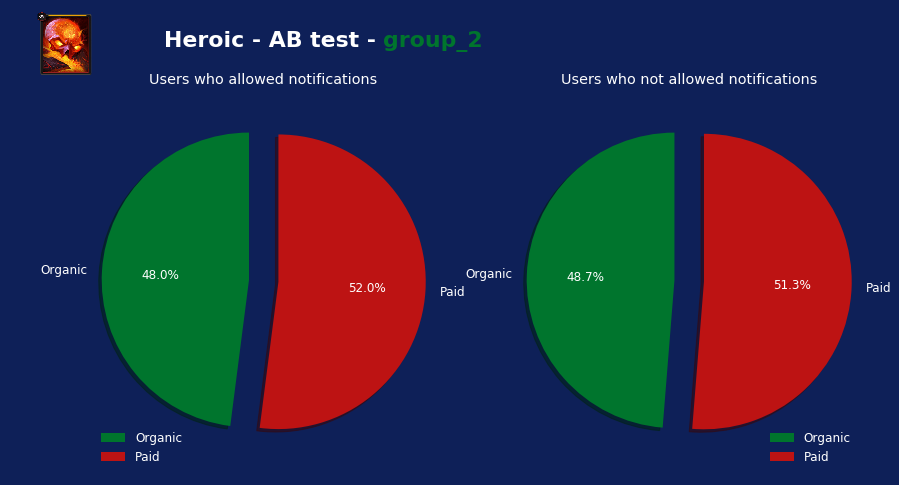

In [28]:
fig = plt.figure()
plt.subplot(121)
plt.pie(by_reg_channel_true,
    labels=by_reg_channel_true.index,
    shadow=True,
    colors=colors,
    explode=(.2, 0),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower left")
plt.title("Users who allowed notifications")

plt.subplot(122)
plt.pie(by_reg_channel_false,
    labels=by_reg_channel_false.index,
    shadow=True,
    colors=colors,
    explode=(0, .2),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower right")
plt.title('Users who not allowed notifications')
plt.tight_layout()

pretty_plot("https://www.bluemoongame.com/wp-content/uploads/ewpt_cache/199x0_100_1_c_FFFFFF_b48491a22cb9726bf1a32cf3a57405da.png")

Users are equaly splited by registration channel, no matter of notification status.

In [29]:
by_payer = g2_notifications.groupby(["allowed_notifications", "payer"]).login_id.count()
by_payer_false = by_payer[0]
by_payer_true = by_payer[1]
by_payer

allowed_notifications  payer
False                  False    507
                       True       4
True                   False    840
                       True      21
Name: login_id, dtype: int64

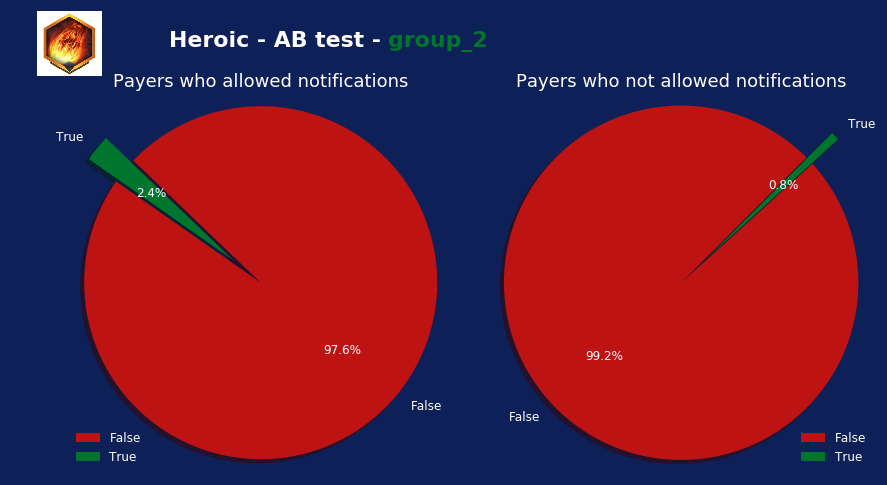

In [36]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (12, 6)
colors = ["#bd1313", "#00752d"]
plt.subplot(121)
plt.pie(by_payer_true,
    labels=by_payer_true.index,
    shadow=True,
    colors=colors,
    explode=(.2, 0),
    startangle=145,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower left")
plt.title("Payers who allowed notifications", fontsize=18)

plt.subplot(122)
plt.pie(by_payer_false,
    labels=by_payer_false.index,
    shadow=True,
    colors=colors,
    explode=(0, .2),
    startangle=45,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc="lower right")
plt.title('Payers who not allowed notifications', fontsize=18)
plt.tight_layout()

pretty_plot("Heroic-Magic-Duel-Ruul-Spell-Meteor-Strike.jpg")

It's normal that we have small amount of users who are payers in comparison to others who are not. Despite of that, we can see that we have more payers who allowed notifications than the ones who not allowed. 

### Which other feature contribute the most

#### Load all user history data

In [24]:
user_data = pd.read_csv("user_data.csv", low_memory=False)

#### Drop rows that doesn't contain allowed notification status

In [25]:
user_data.drop(user_data[user_data["allowed_notifications"].isnull()].index, inplace=True)

#### Convert allowed notifications column to 0 and 1 values

In [26]:
user_data["allowed_notifications_int"] = user_data["allowed_notifications"].astype(int)

#### Get most correlated features with allowed notifications (Pearson method)

__The Pearson__ correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable. <br>
In our task we are intersted in relatioships with categorical variable (allowed notifications), and because we converted boolean variable into binary, we can use Pearson correlation. In this case it's called __point-biserial correlation__.
<br><br>
Our variable is categorical, but doesn't have order of values. That means it's not ordinal variable, so we don't use Kendall or Spearman correlation.

In [27]:
user_data.corr("pearson")[np.abs(user_data.corr()["allowed_notifications_int"]) > 0.1]['allowed_notifications_int'].sort_values(ascending=False)

allowed_notifications_int           1.000000
gold                                0.172638
minion_upgrades                     0.168460
gold_gained_total                   0.168456
cards_gained_total                  0.162581
arena_level                         0.161527
minion_cards_gained_common_total    0.154652
runes_gained_total_class2_tier1     0.151600
minion_cards_gained_rare_total      0.147832
sessions_count                      0.147760
victory_chests_opened_total         0.147040
free_chests_opened_total            0.146227
runes_stash_tier2                   0.144202
runes_gained_total_tier_2           0.144202
runes_spent_class1_tier1            0.143852
campaign_battles_total              0.142674
campaign_battles                    0.142335
hero_shards                         0.141830
runes_gained_total_class1_tier1     0.141814
silver_chests_opened_total          0.141657
runes_spent_class2_tier1            0.140179
battles_won_total                   0.138685
runes_spen

Altough, correlations are weak, we can conclude that correlations are positive. That means with more quantity for in-game features and with more time spent on game playing, probability notification allowing increases!     